In [2]:
import numpy as np
import pandas as pd

In [3]:
def sort_X_y_groups(X,y,groups):
    sorted_indices = np.argsort(groups)
    return X[sorted_indices], y[sorted_indices], groups[sorted_indices]

In [4]:
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):

    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=plt.cm.coolwarm,
            vmin=-0.2,
            vmax=1.2,
        )

    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=plt.cm.tab20
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=plt.cm.Set1
    )

    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    cmap_cv = plt.cm.coolwarm
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    return ax

Sorted X: [ 10  70   5  80  50   1  10  60 130 120 110 100  90  80  70  60  50  40
  30  20]
Sorted y: [0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0]
Sorted groups: [ 0  0  1  2  2  3  3  3  4  5  6  7  8  9 10 11 12 13 14 15]


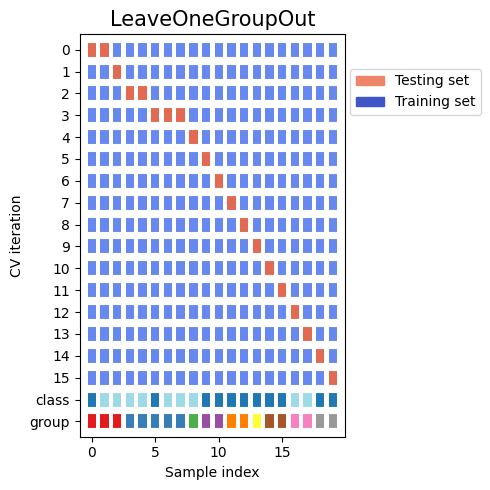

[(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), array([0, 1]), 0), (array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([2]), 1), (array([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]), array([3, 4]), 2), (array([ 0,  1,  2,  3,  4,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([5, 6, 7]), 3), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([8]), 4), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([9]), 5), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), array([10]), 6), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17,
       18, 19]), array([11]), 7), (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17,
       18, 19]), array([12]), 8), (array([ 0,  1,  2,  3,  4

In [5]:
from sklearn.model_selection import LeaveOneGroupOut

# Original arrays converted to numpy arrays
X = np.array([1, 5, 10, 50, 60, 70, 80, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
y = np.array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
groups = np.array([3, 1, 3, 2, 3, 0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0])

#fig, ax = plt.subplots()

fig, ax = plt.subplots(figsize=(5, 5))  # Set the figure size to 10x5 inches

logo  = LeaveOneGroupOut()

#find maximum values of groups
X_sorted, y_sorted, groups_sorted = sort_X_y_groups(X, y, groups)

print("Sorted X:", X_sorted)
print("Sorted y:", y_sorted)
print("Sorted groups:", groups_sorted)

plot_cv_indices(logo , X_sorted, y_sorted, groups_sorted, ax, np.max(groups)+1)
filename = f'figure.png'
#plt.savefig(filename)
plt.show()

cv = logo.split(X_sorted, y_sorted, groups_sorted)

cv_list = [(train, test, k) for k, (train, test) in enumerate(cv)]
print(cv_list)

In [6]:
def count_groups(groups):
    max_group = groups.max()
    group_counts = np.zeros(max_group + 1, dtype=int)
    counts = np.bincount(groups)
    group_counts[:len(counts)] = counts
    return group_counts

print(count_groups(np.asarray(groups)))
print(type(count_groups(np.asarray(groups))))

[2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1]
<class 'numpy.ndarray'>


In [7]:
def get_included_claases_pairs(classes, pairs, groups, group_no_to_exclude):
    mask = groups != group_no_to_exclude
    classes_included = classes[mask]
    pairs_included = pairs[mask]
    return classes_included, pairs_included

In [8]:
X = np.array([1, 5, 10, 50, 60, 70, 80, 130, 120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10])
y = np.array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
groups = np.array([3, 1, 3, 2, 3, 0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0])

group_no_to_exclude = 3
classes_included, pairs_included = get_included_claases_pairs(X, y, groups, group_no_to_exclude)
print("Classes Included:", classes_included)
print("Pairs Included:", pairs_included)

Classes Included: [  5  50  70  80 130 120 110 100  90  80  70  60  50  40  30  20  10]
Pairs Included: [1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0]


In [15]:
def assign_groups(df, column_name):
    atc_to_group = {}
    group_id = 0
    
    for index, row in df.iterrows():
        codes = row[column_name]
        
        if codes not in atc_to_group:
            atc_to_group[codes] = group_id
            group_id += 1
        
        df.at[index, 'group'] = atc_to_group[codes]
    
    return df

In [24]:
def assign_groups(df, column_name):
    atc_to_group = {}
    group_id = 0
    
    for index, row in df.iterrows():
        codes = row[column_name]
        
        if codes not in atc_to_group:
            atc_to_group[codes] = group_id
            group_id += 1
        
        df.at[index, 'group'] = atc_to_group[codes]
    
    # Inverting the dictionary to get group id as key and codes as value
    group_to_atc = {v: k for k, v in atc_to_group.items()}
    
    return df, group_to_atc

In [27]:
df = pd.DataFrame(['C', 'A', 'A', 'B', 'D', 'A', 'F'], columns=['group'])

df_groups, group_to_atc = assign_groups(df, 'group')

# get the atc code for group 1
print(group_to_atc[0])

#combined = pd.concat([df_groups, group_to_atc], axis=1)

print(df_groups)

print(group_to_atc)

df_groups['group'] = df_groups['group'].astype(int)
groups_array = df_groups['group'].values

C
  group
0     0
1     1
2     1
3     2
4     3
5     1
6     4
{0: 'C', 1: 'A', 2: 'B', 3: 'D', 4: 'F'}


In [5]:
group_numbers_to_exclude = np.array([i for i in range(42)])
print(group_numbers_to_exclude)



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


In [6]:
def count_groups(groups):
    max_group = groups.max()
    group_counts = np.zeros(max_group + 1, dtype=int)
    counts = np.bincount(groups)
    group_counts[:len(counts)] = counts
    return group_counts

In [5]:
def simplify_ec_number(ec):
    parts = ec.split('.')
    if ec.startswith('2.7.10'):
        return '.'.join(parts[:5])
    elif ec.startswith('2.7'):
        return '.'.join(parts[:3])
    elif ec.startswith('NONE'):
        return 'NONE'
    else:
        return '.'.join(parts[:2])

In [9]:
known_drugs_targets = pd.read_csv("../data/opentargets/known_drugs_targets.csv")

pairs = known_drugs_targets[['drug', 'target']].values[300:500]
df_pairs = pd.DataFrame(pairs)
df_pairs.columns = ['drug', 'target']
print('df_pairs shape: ', df_pairs.shape)
print(df_pairs.columns)
display(df_pairs.head())

df_pairs shape:  (200, 2)
Index(['drug', 'target'], dtype='object')


,drug,target
0,CHEMBL.COMPOUND:CHEMBL490,UniProtKB:P31645
1,CHEMBL.COMPOUND:CHEMBL742,UniProtKB:Q14957
2,CHEMBL.COMPOUND:CHEMBL1431,UniProtKB:Q86Y39
3,CHEMBL.COMPOUND:CHEMBL3545252,UniProtKB:Q3ZCM7
4,CHEMBL.COMPOUND:CHEMBL1117,UniProtKB:P11388


In [12]:
targets_ec_numbers = pd.read_csv("target_ec_numbers_05_07_2024.csv")
targets_ec_numbers['simplified_ec_number'] = targets_ec_numbers['target_ec_number'].apply(simplify_ec_number)
targets_ec_numbers.columns = ['index', 'target_ec_number', 'simplified_ec_number']
ec = pd.concat([targets_ec_numbers,known_drugs_targets], axis=1)
ec = ec.drop(['index', 'target_ec_number', 'drug'], axis=1)
print('ec shape: ', ec.shape)
print(ec.columns)
display(ec.head())

ec shape:  (251324, 2)
Index(['simplified_ec_number', 'target'], dtype='object')


,simplified_ec_number,target
0,7.1,UniProtKB:O75251
1,2.7.1,UniProtKB:P42336
2,2.7.10.1,UniProtKB:P09619
3,NONE,UniProtKB:Q8NER1
4,2.7.1,UniProtKB:O00329


In [18]:
ec_unique = ec.drop_duplicates(subset=['target'], keep='first')
display(ec_unique)
result = pd.merge(df_pairs, ec_unique, on='target', how='left')
display (result)

,simplified_ec_number,target
0,7.1,UniProtKB:O75251
1,2.7.1,UniProtKB:P42336
2,2.7.10.1,UniProtKB:P09619
3,NONE,UniProtKB:Q8NER1
4,2.7.1,UniProtKB:O00329
...,...,...
213715,2.7.11,UniProtKB:Q15418
225254,2.7.11,UniProtKB:Q8IW41
235057,3.3,UniProtKB:P34913
236447,2.7.11,UniProtKB:P37023


,drug,target,simplified_ec_number
0,CHEMBL.COMPOUND:CHEMBL490,UniProtKB:P31645,NONE
1,CHEMBL.COMPOUND:CHEMBL742,UniProtKB:Q14957,NONE
2,CHEMBL.COMPOUND:CHEMBL1431,UniProtKB:Q86Y39,NONE
3,CHEMBL.COMPOUND:CHEMBL3545252,UniProtKB:Q3ZCM7,NONE
4,CHEMBL.COMPOUND:CHEMBL1117,UniProtKB:P11388,5.6
...,...,...,...
195,CHEMBL.COMPOUND:CHEMBL1496,UniProtKB:P04035,1.1
196,CHEMBL.COMPOUND:CHEMBL25,UniProtKB:P35354,1.14
197,CHEMBL.COMPOUND:CHEMBL1200569,UniProtKB:P0DMS8,NONE
198,CHEMBL.COMPOUND:CHEMBL526,UniProtKB:P47870,NONE


In [20]:
targets_ec_numbers = pd.read_csv("target_ec_numbers_05_07_2024.csv")
targets_ec_numbers['simplified_ec_number'] = targets_ec_numbers['target_ec_number'].apply(simplify_ec_number)
targets_ec_numbers.columns = ['index', 'target_ec_number', 'simplified_ec_number']
ec = pd.concat([targets_ec_numbers,known_drugs_targets], axis=1)
ec = ec.drop(['index', 'target_ec_number', 'drug'], axis=1)
ec_unique = ec.drop_duplicates(subset=['target'], keep='first')
pair_simplified_ec_numbers = pd.merge(df_pairs, ec_unique, on='target', how='left')
pair_simplified_ec_numbers = pair_simplified_ec_numbers.drop(['target','drug'], axis=1)
print(pair_simplified_ec_numbers)

    simplified_ec_number
0                   NONE
1                   NONE
2                   NONE
3                   NONE
4                    5.6
..                   ...
195                  1.1
196                 1.14
197                 NONE
198                 NONE
199                 NONE

[200 rows x 1 columns]
